In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
ff1.plotting.setup_mpl()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import os

import numpy as np
import pandas as pd
ff1.Cache.enable_cache('C:/Users/benme/OneDrive - The Perse School/Formula 1')

In [3]:
race_name, race_year = input("Enter race name"), int(input("Enter race year"))
race = ff1.get_session(race_year, race_name, 'R')
race.load()

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver  8: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '16', '4', '44', '55', '11', '10', '31', '99', '5', '6', '26', '23', '7', '63', '8', '20', '18', '3', '33']


In [4]:
choice = int(input("Enter an option number: \n"
                   "1. Lap Time vs Lap Number \n"
                   "2. Delta to Leader \n"
                   "3. Tyre Delta \n"))
continue_ = True
drivers_list = []
if choice == 1:
    while continue_ == True:
        drivers = input("Which driver(s) would you like to plot \n"
                        "Input 'all' for all drivers \n"
                        "Else input each driver one by one using their three letter identifier and type 'finish' when done")
        if drivers == 'all' or drivers == 'finish':
            continue_ = False
        else:
            drivers_list.append(drivers)
    if len(drivers_list) < 10:
        line_width = 10
    else:
        line_width = 7
    if not drivers == 'all':
        race_laps = race.laps.pick_accurate().pick_drivers(drivers_list).filter(items = ['Driver', 'LapTime', 'Compound', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint'])
    else:
        race_laps = race.laps.pick_accurate().filter(items = ['Driver', 'LapTime', 'Compound', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint'])
elif choice == 2:
    while continue_ == True:
        drivers = input("Which driver(s) would you like to plot \n"
                        "Input 'all' for all drivers \n"
                        "Else input each driver one by one using their three letter identifier and type 'finish' when done")
        if drivers == 'all' or drivers == 'finish':
            continue_ = False
        else:
            drivers_list.append(drivers.upper())
    if not drivers == 'all':
        race_laps = race.laps.pick_drivers(drivers_list).filter(items = ['Driver', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'IsAccurate'])
    else:
        race_laps = race.laps.filter(items = ['Driver', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'IsAccurate'])
elif choice == 3:
    drivers = input("Enter the three letter identifier for the driver you would like to analyse")



In [5]:
print(len(race_laps))
race_laps.to_excel('test.xlsx')

1045


In [6]:
#find the leader of each sector - set their time as 0
#for every other driver and sector their time - leader time (max 5 drivers)
#for each driver and each lap in the race add sector 1 time of x.0 sector 2 time to x.3 and sector 3 time to x.6 to a pandas dataframe
#plot dataframe same as before

In [29]:
max_lap = race_laps['LapNumber'].max()
sectors = ['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime']
delta_df = pd.DataFrame([], columns = ['Driver', 'Lap Number', 'Delta'])
for n in range(0, max_lap):
    race_lap = race_laps['LapNumber'] == (n+1)
    race_lap = race_laps[race_lap]
    for f in range(len(sectors)):
        lap_place = float("{:.2f}".format((f/3)+(n+1)))
        pace = race_lap[sectors[f]].min()

        for l in range(len(race_lap)):
            time = race_lap[sectors[f]].iloc[[l]].values[0] - pace
            driver = race_lap['Driver'].iloc[[l]].str.strip().to_string(index = False)
            data = {'Driver': [driver],
                    'Lap Number': [lap_place],
                    'Delta': [time]}
            s1 = pd.DataFrame(data)
            delta_df = pd.concat([delta_df, s1])
#delta_df.to_excel('Delta Test.xlsx')

In [34]:
delta_df_drivers = delta_df['Lap Number'] == 1
delta_df_drivers = delta_df[delta_df_drivers]
driver_list = delta_df_drivers['Driver'].tolist()
dict_ = {}
for n in driver_list:
    dict_[n] = delta_df.loc[(delta_df['Driver'] == n)]
print(dict_)

{'BOT':    Driver Lap Number                   Delta
0     BOT        1.0                     NaT
0     BOT       1.33         0 days 00:00:00
0     BOT       1.67         0 days 00:00:00
0     BOT        2.0         0 days 00:00:00
0     BOT       2.33         0 days 00:00:00
..    ...        ...                     ...
0     BOT      66.33  0 days 00:04:22.522000
0     BOT      66.67  0 days 00:04:21.405000
0     BOT       67.0         0 days 00:00:00
0     BOT      67.33         0 days 00:00:00
0     BOT      67.67         0 days 00:00:00

[201 rows x 3 columns], 'LEC':    Driver Lap Number                   Delta
0     LEC        1.0                     NaT
0     LEC       1.33  0 days 00:00:03.916000
0     LEC       1.67  0 days 00:00:05.345000
0     LEC        2.0  0 days 00:00:05.910000
0     LEC       2.33  0 days 00:00:06.987000
..    ...        ...                     ...
0     LEC      65.33  0 days 00:05:36.216000
0     LEC      65.67  0 days 00:05:35.101000
0     LEC      

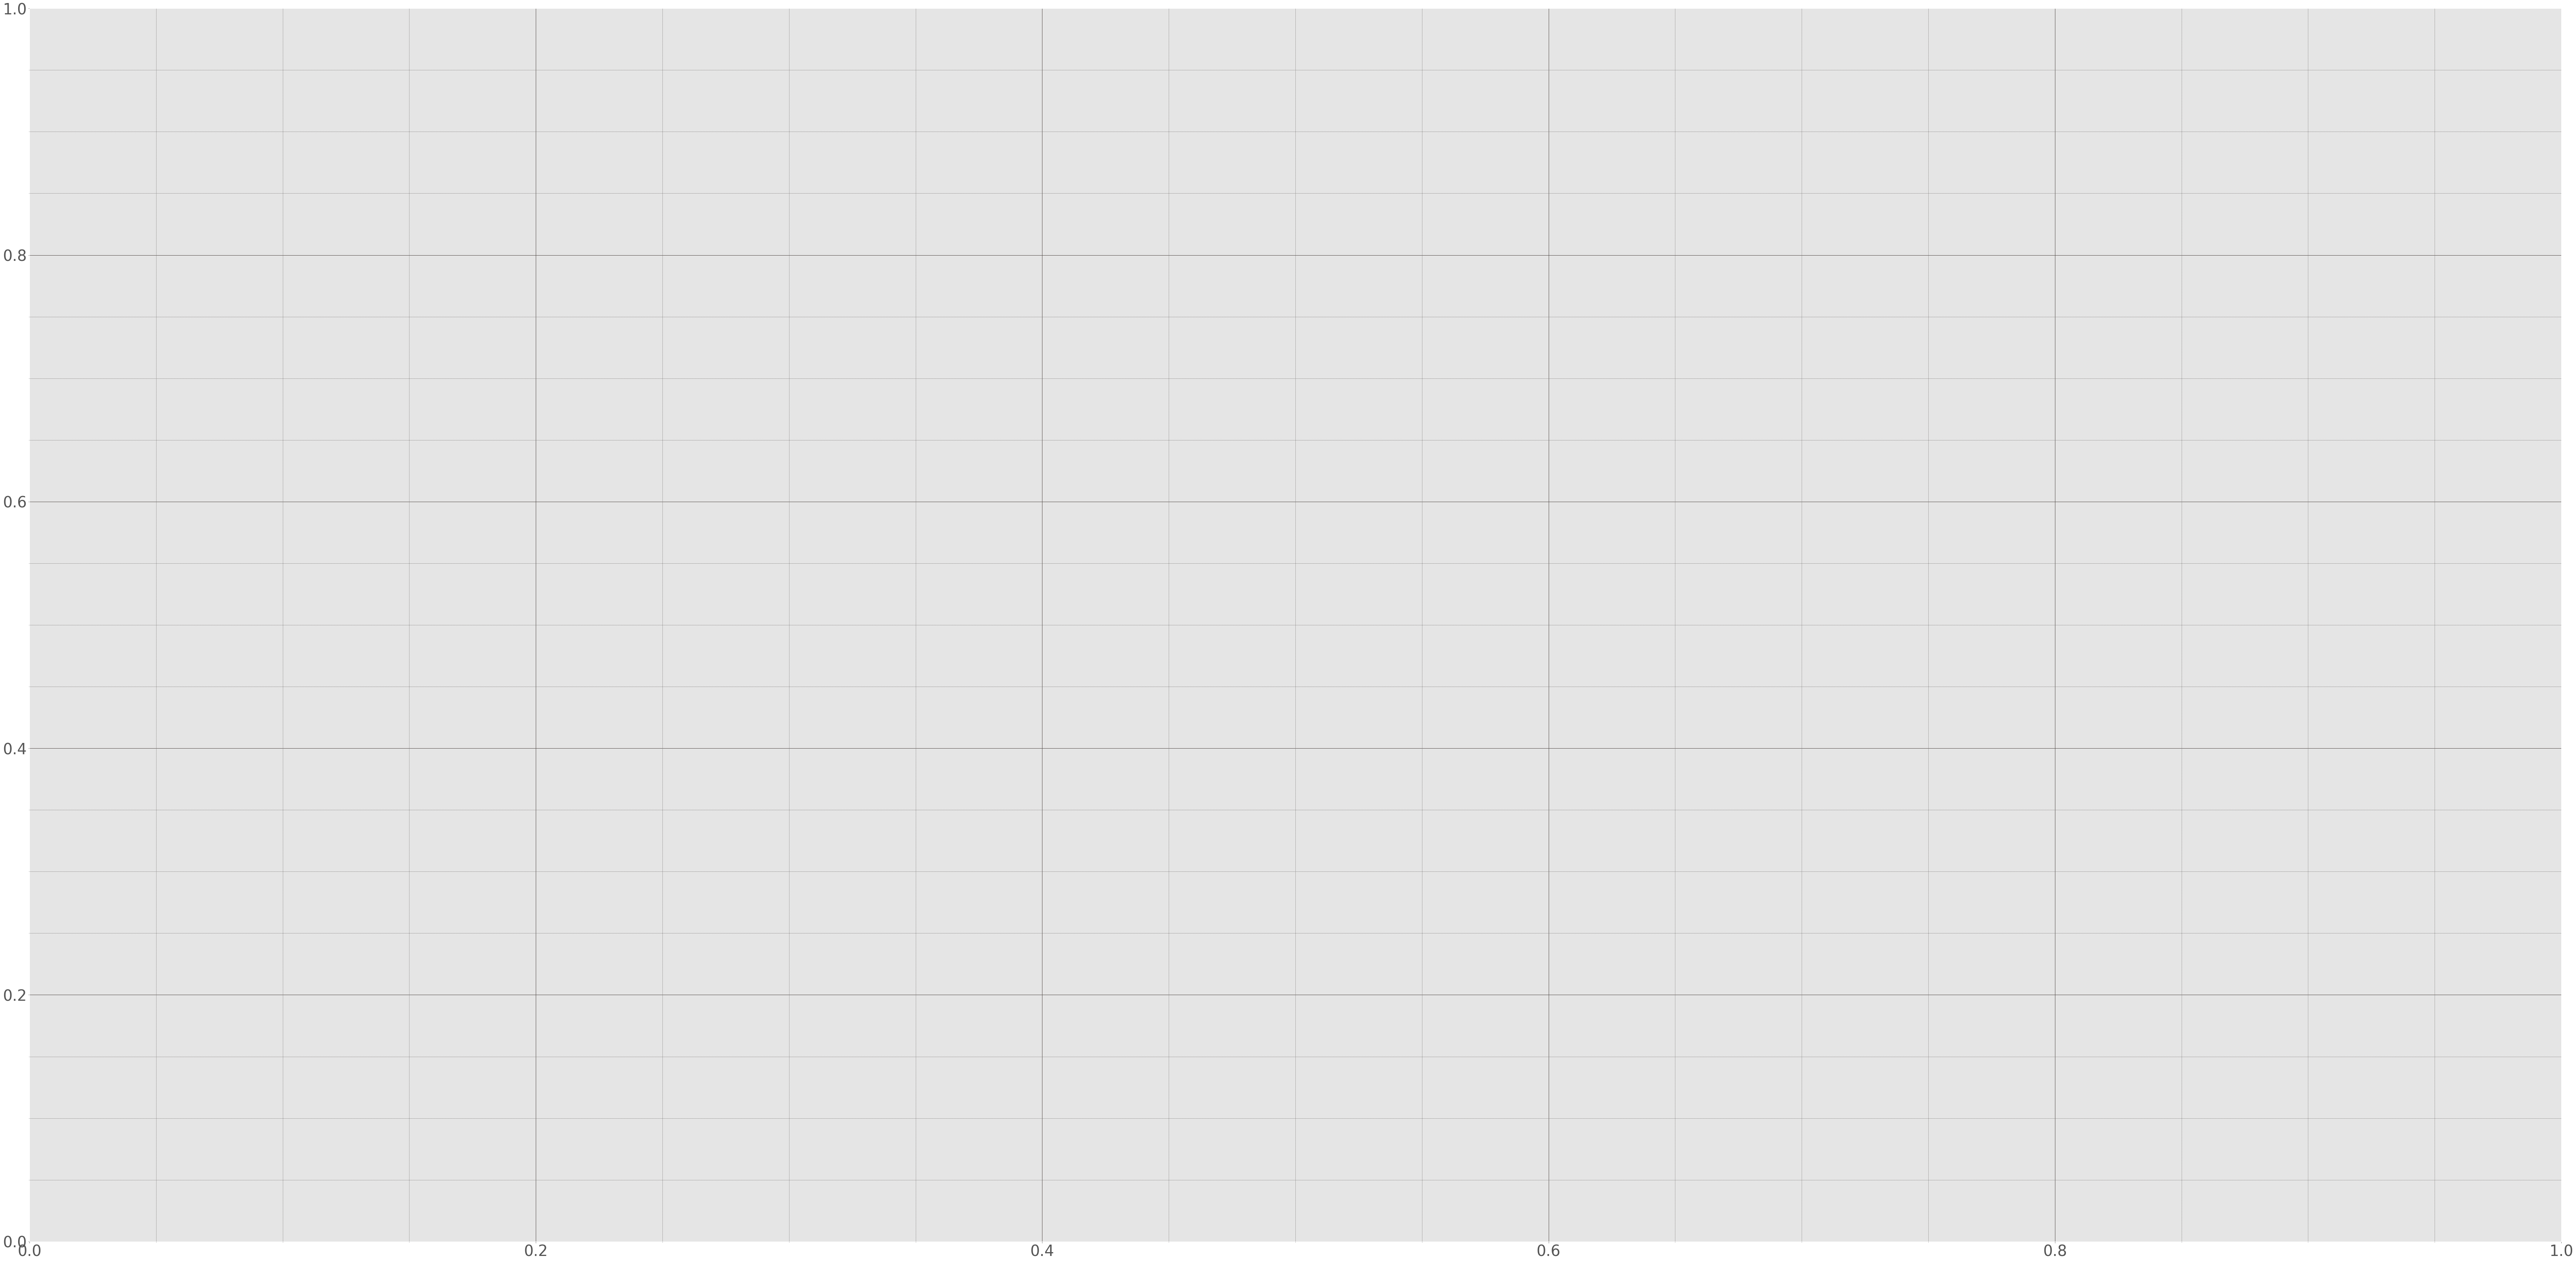

In [36]:
plot_size = (120, 60)
if not drivers == 'all':
    plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - {drivers_list} - Delta to Leader'
else:
    plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - Delta to Leader'
plot_filename = plot_title.replace(" ", "") + '.png'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = plot_size
plt.rcParams['text.color'] = 'b'
plt.rcParams['legend.labelcolor'] = 'w'
plt.rcParams['font.size'] = 40
fig, ax = plt.subplots(1)

In [ ]:
ax = plt.subplot(1, 1, l+1)
ax = plt.gca()
ax.plot(dict_[driver]['LapNumber'], dict_[driver]['LapTime'],color=team_color, label=driver, linewidth = line_width)
ax.set_ylim(ax.axes.dataLim.min[1] - QUARTER_SECOND, upper)
ax.set(xlabel='Lap Number', ylabel='Lap Time', title=f"{plot_title} Stint {stint_number}")
ax.legend(loc='upper left')